### Dictionary of data

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

age = age in years 

sex = (1 = male; 0 = female) 

cp = chest pain type 

trestbps= resting blood pressure (in mm Hg on admission to the hospital) 

chol = serum cholestoral in mg/dl

fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg = resting electrocardiographic results

thalach = maximum heart rate achieved

exang = exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment

ca = number of major vessels (0-3) colored by flourosopy

thal 3 = normal; 6 = fixed defect; 7 = reversable defect

target = 1 or 0

In [1]:
import pandas as pd

# charts
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
url = 'https://raw.githubusercontent.com/caiohenrique12/pos-data-science/master/datasets/Heart%20Disease%20Dataset.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Checking type of columns and null values

In [5]:
def info_null_values(df):
  info = pd.DataFrame(df.dtypes).T.rename(index={0: 'type'})
  info = info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'Null'}))
  info = info.append(pd.DataFrame(df.isnull().sum()/len(df) * 100).T.rename(index={0: 'Null(%)'}))
  return info

#### Without null values

In [6]:
info_null_values(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
type,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64
Null,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Null(%),0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 1 - Start with EDA

#### 1.1 - Population by gender

[Text(0, 0, 'F'), Text(0, 0, 'M')]

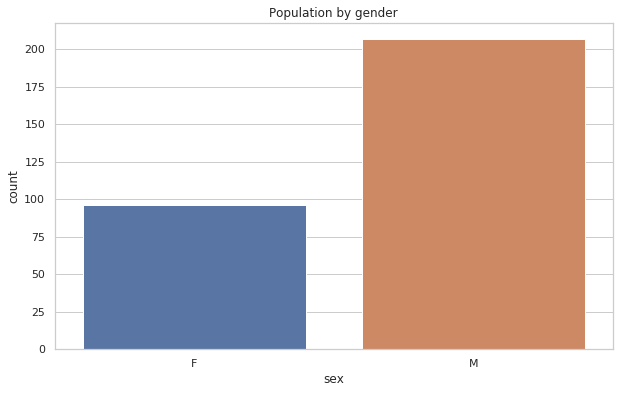

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='sex', data=df)
ax.set_title("Population by gender")
ax.set_xticklabels(['F', 'M'])

Our dataset has more men than women

#### 1.3 - Distribution age

Text(0.5, 1.0, 'Distribution of age')

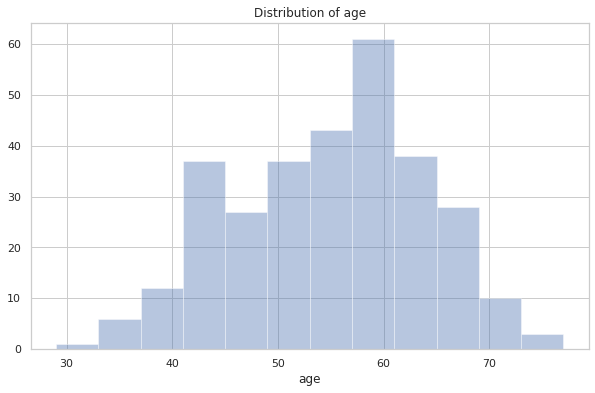

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(df['age'], kde=False);
ax.set_title("Distribution of age")

#### 1.3.1 - Boxplot for age

[Text(0, 0, 'F'), Text(0, 0, 'M')]

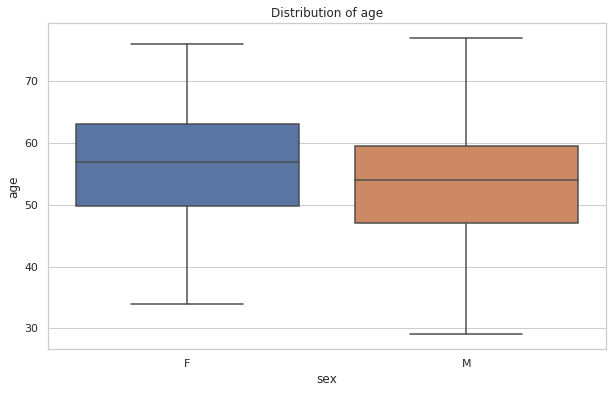

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x='sex', y='age', data=df)
ax.set_title("Distribution of age")
ax.set_xticklabels(['F', 'M'])

#### 1.3.2 - Dispersion of age

[Text(0, 0, 'F'), Text(0, 0, 'M')]

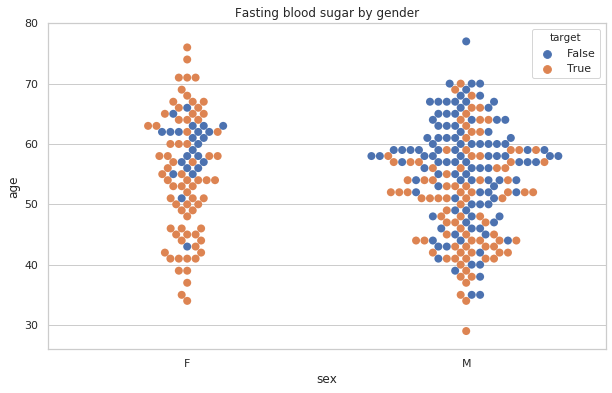

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.swarmplot(x="sex", y="age", data=df, size=8,
                   hue='target', hue_order= [False, True])

ax.set_title("Fasting blood sugar by gender")
ax.set_xticklabels(['F', 'M'])

In the previous chart (1.3.1), we observed that our database contains more people aged between 50 to 60, but we observed that for both men and women, the age with the most positive records is between 40 and 60 years, so we can say that there is no specific age range for suffering a heart attack.

#### 1.4 - Distribution of Serum cholestoral

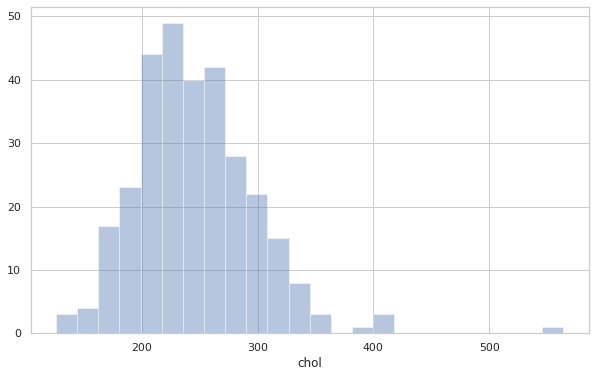

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(df['chol'], kde = False);

#### 1.4.1 - Cholesterol dispersion by age

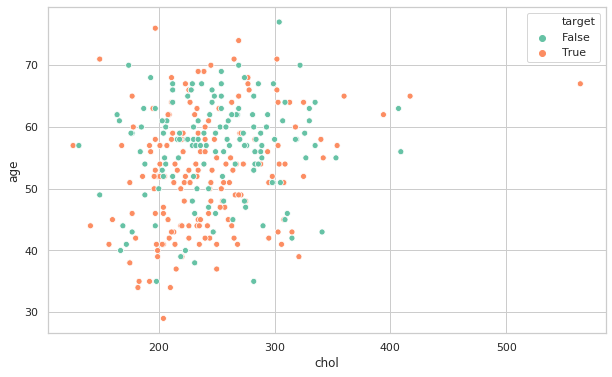

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.scatterplot(x="chol", y="age", data=df,
                     hue='target', hue_order= [False, True],
                     palette="Set2")

#### 1.4.2 - Cholesterol density by age

[Text(0, 0, 'F'), Text(0, 0, 'M')]

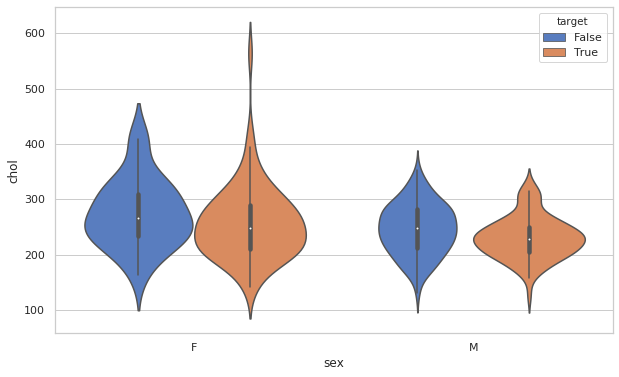

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.violinplot(x="sex", y="chol",
                    hue='target', hue_order= [False, True],
                    data=df, palette="muted")
ax.set_xticklabels(['F', 'M'])

Graph 1.4.1 reinforces our hypothesis of positive cases for ages between 40 and 60 years, but we can also see here that, individuals who have cholesterol between 150 to 350, there is a greater incidence of heart attacks. In graph 1.4.2, women have a density between 200 and 300 of cholesterol than men, but individuals within this range, have more incidence for infarction.

#### 1.5 - Distribution of Resting blood pressure

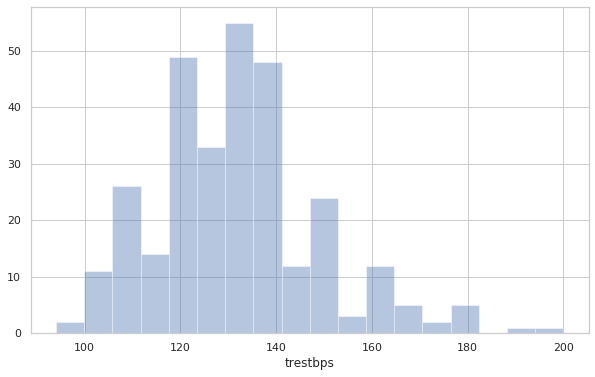

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(df['trestbps'], kde= False)

#### 1.5.1 -  Resting blood pressure dispersion by age

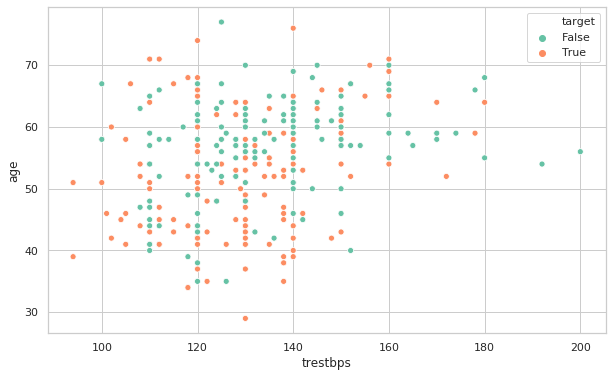

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.scatterplot(x="trestbps", y="age", data=df,
                     hue='target', hue_order= [False, True],
                     palette="Set2")

[Text(0, 0, 'F'), Text(0, 0, 'M')]

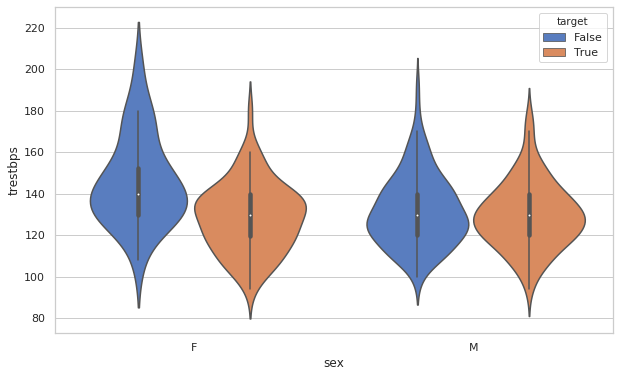

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.violinplot(x="sex", y="trestbps",
                    hue='target', hue_order= [False, True],
                    data=df, palette="muted")
ax.set_xticklabels(['F', 'M'])

In graph 1.5.1 and 1.5.2 we can analyze, that individuals who have blood pressure between 100 to 140, had more occurrence of infarction, we can raise a hypothesis that, individuals who have very high blood pressure do not have a very high chance of infarction.

### 2 - Preprocessing

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 2.1 - Creating new column 'age_categ'

In [18]:
df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [19]:
df['age_categ'] = 0
df.loc[df.age <= 29, 'age_categ'] = 1
df.loc[(df.age > 29) & (df.age <= 47.5), 'age_categ'] = 2
df.loc[(df.age > 47.5) & (df.age <= 55), 'age_categ'] = 3
df.loc[(df.age > 55) & (df.age <= 61), 'age_categ'] = 3
df.loc[df.age > 61, 'age_categ'] = 4

#### 2.2 - Creating columns from 'age_cate' dummies

In [20]:
age_categ_dummies = pd.get_dummies(df.age_categ, prefix='age_categ',drop_first=True)
df.drop(['age_categ'], axis=1)
df = pd.concat([df, age_categ_dummies], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_categ,age_categ_2,age_categ_3,age_categ_4
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,4,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,3,0,1,0


In [21]:
data = df.copy()

### 3 - Starting ML

In [22]:
# ml libs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedShuffleSplit, ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

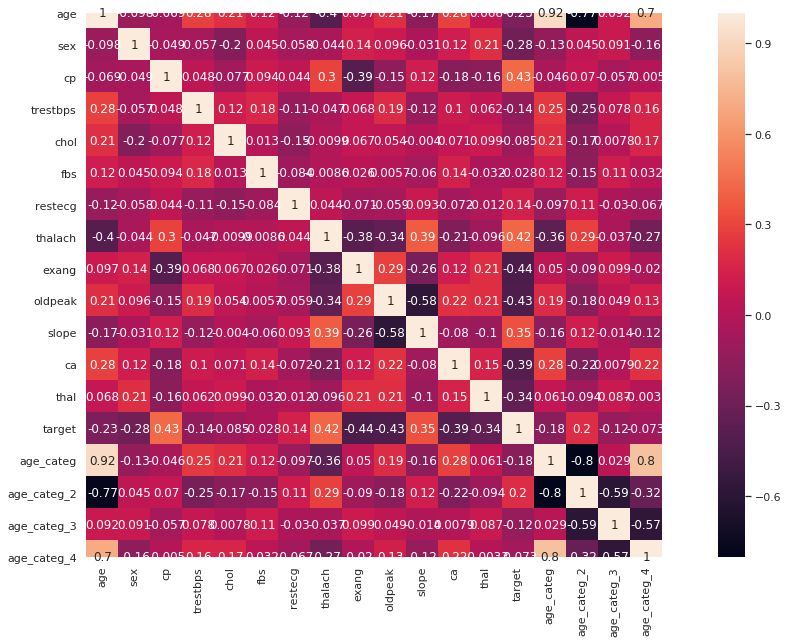

In [23]:
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(data.corr(), square=True, annot=True)

#### 3.1 - Split dataset for train and test

In [24]:
X = data.drop(['target'], axis=1).values
y = data.target.values
RANDOM_STATE = 16

#### 3.2 - Initializing estimators

In [25]:
one_hot = OneHotEncoder()

random_clf = RandomForestClassifier()
decision_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()
mlp_clf = MLPClassifier()

#### 3.3 - Creating function for initialize pipeline by estimator

In [26]:
def pipeline_init(estimator):
  simple_imputer = SimpleImputer()
  pipe = Pipeline(steps=[('imputer', simple_imputer),
                         ('estimator', estimator)])
  return pipe

#### 3.4 - Creating function for intialize cross validation

In [27]:
def run_cros_val_score(estimator, X, y, scoring, cv):
  return cross_val_score(random_pipe, X_test, y_test, scoring=scoring, cv=cv)

#### 3.5 - train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

#### 3.6 - Creating classifiers model

In [29]:
random_pipe = pipeline_init(random_clf)
random_pipe.fit(X_train, y_train)
y_pred = random_pipe.predict(X_test)
cross_val = run_cros_val_score(random_pipe, X_test, y_test, 'f1_weighted', 5)

print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred))
print(f'CROSS VAL SCORE {cross_val.mean()}')

/home/dev/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        49
           1       0.84      0.86      0.85        42

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

CROSS VAL SCORE 0.7550669780108465


In [30]:
decision_pipe = pipeline_init(decision_clf)
decision_pipe.fit(X_train, y_train)
y_pred_dct = decision_pipe.predict(X_test)
cross_val = run_cros_val_score(decision_pipe, X_test, y_test, 'f1_weighted', 5)

print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_dct))
print(f'CROSS VAL SCORE {cross_val.mean()}')

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        49
           1       0.73      0.83      0.78        42

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91

CROSS VAL SCORE 0.8024027984399501


In [31]:
knn_pipe = pipeline_init(knn_clf)
knn_pipe.fit(X_train, y_train)
y_pred_knn = decision_pipe.predict(X_test)
cross_val = run_cros_val_score(knn_pipe, X_test, y_test, 'f1_weighted', 5)

print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_knn))
print(f'CROSS VAL SCORE: {cross_val.mean()}')

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        49
           1       0.73      0.83      0.78        42

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91

CROSS VAL SCORE: 0.7768269876427099


In [32]:
mlp_pipe = pipeline_init(mlp_clf)
mlp_pipe.fit(X_train, y_train)
y_pred_mlp = mlp_pipe.predict(X_test)
cross_val = run_cros_val_score(mlp_pipe, X_test, y_test, 'f1_weighted', 5)

print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_mlp))
print(f'CROSS VAL SCORE: {cross_val.mean()}')

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      0.65      0.76        49
           1       0.70      0.93      0.80        42

    accuracy                           0.78        91
   macro avg       0.81      0.79      0.78        91
weighted avg       0.81      0.78      0.78        91

CROSS VAL SCORE: 0.7687649003155801


Com base nos resultados dos 4 classficadores escolhidos, iremos aplicar hiperparametros no Random forest clf, por ter obtido a melhor pontuação.

### 4 - Tuning Random Forest

In [41]:
parameters = {'estimator__min_samples_leaf': [3,5,7,10,100],
              'estimator__min_samples_split': [3,5,7,10,100],
              'estimator__n_estimators': [10, 100, 1000],
              'estimator__max_depth': [6,10,15,20,None],
              'estimator__random_state': [RANDOM_STATE]}

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
gridsearch = GridSearchCV(random_pipe, parameters, scoring='f1', cv=sss)
gridsearch.fit(X_train, y_train)
y_pred = gridsearch.predict(X_test)

In [42]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred))
print('CROSS VAL SCORE')
run_cros_val_score(gridsearch, X_test, y_test, 'f1_weighted', 5).mean()

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        49
           1       0.83      0.93      0.88        42

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

CROSS VAL SCORE


0.7462936157982598

In [43]:
gridsearch.best_estimator_

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('estimator',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=3, min_samples_split=3,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=16,
                                

In [36]:
gridsearch.best_params_

{'estimator__max_depth': 6,
 'estimator__min_samples_leaf': 3,
 'estimator__min_samples_split': 3,
 'estimator__n_estimators': 100,
 'estimator__random_state': 16}

#### 4.1 Learning Curve

In [37]:
def plot_learning_curve(estimator, title, X, y):
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    ylim=(0.7, 1.01)
    n_jobs=1
    train_sizes=np.linspace(.1, 1.0, 5)

    plt.figure()
    plt.title(title)
    plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                            cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/dev/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

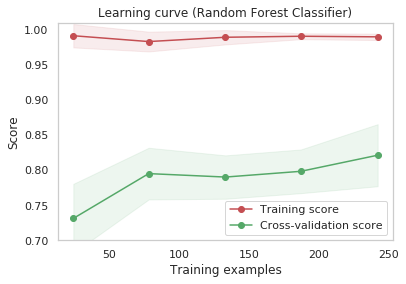

In [38]:
plot_learning_curve(random_pipe, 'Learning curve (Random Forest Classifier)', X, y)

#### 4.2 Validation Curve

In [39]:
def model_complexity(estimator, title, param_name, values_param, scoring, X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Vary the max_depth parameter from 1 to 10

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(estimator, X, y, \
        param_name = param_name, param_range = values_param, cv = cv, scoring = scoring)

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    ylim=(0.7, 1.01)
    plt.ylim(*ylim)
    plt.title(title)
    plt.grid()
    plt.plot(values_param, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(values_param, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(values_param, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(values_param, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

In [40]:
model_complexity(random_pipe, '')

TypeError: model_complexity() missing 5 required positional arguments: 'param_name', 'values_param', 'scoring', 'X', and 'y'

#### 4.3 Features importance